In [1]:
import json
import pandas as pd
import os
import sys
from pathlib import Path
from collections import defaultdict
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

In [2]:
json_files_path = Path(parent_dir) / 'mgr_data/quality_results'
json_files = json_files_path.glob('*.json')

In [3]:
data = defaultdict(list)
for json_file in json_files:
    method, model = json_file.stem.split('_')[:2]
    data['method'].append(method)
    data['model'].append(model)
    with open(json_file, 'r') as f:
        json_data = json.load(f)
        for k, v in json_data.items():
            for key, value in v.items():
                data[key.upper()].append(value)

In [4]:
df = pd.DataFrame(data)
df

,method,model,AUC,ACC,F1,PREC,REC,FAR,FRR,EER
0,crfiqa,adaface,0.011437,0.929321,0.132481,0.071185,0.953772,0.070818,0.046228,0.046228
1,crfiqa,facenet,0.012088,0.900552,0.098081,0.051785,0.925284,0.099593,0.074716,0.074716
2,grafiqs,resnet100,0.013124,0.815562,0.053632,0.027831,0.735245,0.183863,0.264755,0.264755
3,grafiqs,resnet50,0.027013,0.572675,0.043309,0.022206,0.871642,0.430679,0.128358,0.128358
4,newsdd,adaface,0.010854,0.937894,0.160257,0.087169,0.992136,0.062432,0.007864,0.007864
5,newsdd,facenet,0.031817,0.910727,0.162809,0.089869,0.864326,0.088802,0.135674,0.135674
6,sddfiqa,adaface,0.012506,0.932493,0.151235,0.081980,0.974398,0.067767,0.025602,0.025602
7,sddfiqa,facenet,0.017201,0.883505,0.102988,0.054405,0.962225,0.117045,0.037775,0.037775
8,serfiq,facenet,0.031300,0.899253,0.096247,0.050977,0.859767,0.100499,0.140233,0.140233
9,serfiq,adaface,0.004257,0.925118,0.136465,0.073392,0.970612,0.075161,0.029388,0.029388


In [5]:
latex_table = df.to_latex(index=False, float_format="%.3f", column_format="ll" + "r" * (len(df.columns) - 2))
print(latex_table)

\begin{tabular}{llrrrrrrrr}
\toprule
method & model & AUC & ACC & F1 & PREC & REC & FAR & FRR & EER \\
\midrule
crfiqa & adaface & 0.011 & 0.929 & 0.132 & 0.071 & 0.954 & 0.071 & 0.046 & 0.046 \\
crfiqa & facenet & 0.012 & 0.901 & 0.098 & 0.052 & 0.925 & 0.100 & 0.075 & 0.075 \\
grafiqs & resnet100 & 0.013 & 0.816 & 0.054 & 0.028 & 0.735 & 0.184 & 0.265 & 0.265 \\
grafiqs & resnet50 & 0.027 & 0.573 & 0.043 & 0.022 & 0.872 & 0.431 & 0.128 & 0.128 \\
newsdd & adaface & 0.011 & 0.938 & 0.160 & 0.087 & 0.992 & 0.062 & 0.008 & 0.008 \\
newsdd & facenet & 0.032 & 0.911 & 0.163 & 0.090 & 0.864 & 0.089 & 0.136 & 0.136 \\
sddfiqa & adaface & 0.013 & 0.932 & 0.151 & 0.082 & 0.974 & 0.068 & 0.026 & 0.026 \\
sddfiqa & facenet & 0.017 & 0.884 & 0.103 & 0.054 & 0.962 & 0.117 & 0.038 & 0.038 \\
serfiq  & facenet & 0.031 & 0.899 & 0.096 & 0.051 & 0.860 & 0.100 & 0.140 & 0.140 \\
serfiq & adaface & 0.004 & 0.925 & 0.136 & 0.073 & 0.971 & 0.075 & 0.029 & 0.029 \\
\bottomrule
\end{tabular}



In [19]:
from io import StringIO
latex = StringIO()
latex.write("\\begin{tabular}{ll" + "r" * (len(df.columns) - 2) + "}\n")
latex.write("\\toprule\n")
latex.write("Method & Model & AUC & ACC & F1 & Prec & Rec & FAR & FRR & EER \\\\\n")
latex.write("\\midrule\n")

# Grupowanie i budowanie wierszy z \multirow
from itertools import groupby

for method, group in df.groupby("method"):
    rows = group.to_numpy()
    for i, row in enumerate(rows):
        line = ""
        if i == 0:
            line += f"\\multirow{{{len(rows)}}}{{*}}{{{method}}} & "
        else:
            line += " & "
        line += " & ".join([str(row[1])] + [f"{val:.4f}" for val in row[2:]]) + " \\\\\n"
        latex.write(line)

latex.write("\\bottomrule\n")
latex.write("\\end{tabular}\n")

print(latex.getvalue())

\begin{tabular}{llrrrrrrrr}
\toprule
Method & Model & AUC & ACC & F1 & Prec & Rec & FAR & FRR & EER \\
\midrule
\multirow{2}{*}{crfiqa} & adaface & 0.0114 & 0.9293 & 0.1325 & 0.0712 & 0.9538 & 0.0708 & 0.0462 & 0.0462 \\
 & facenet & 0.0121 & 0.9006 & 0.0981 & 0.0518 & 0.9253 & 0.0996 & 0.0747 & 0.0747 \\
\multirow{2}{*}{grafiqs} & resnet100 & 0.0131 & 0.8156 & 0.0536 & 0.0278 & 0.7352 & 0.1839 & 0.2648 & 0.2648 \\
 & resnet50 & 0.0270 & 0.5727 & 0.0433 & 0.0222 & 0.8716 & 0.4307 & 0.1284 & 0.1284 \\
\multirow{2}{*}{newsdd} & adaface & 0.0109 & 0.9379 & 0.1603 & 0.0872 & 0.9921 & 0.0624 & 0.0079 & 0.0079 \\
 & facenet & 0.0318 & 0.9107 & 0.1628 & 0.0899 & 0.8643 & 0.0888 & 0.1357 & 0.1357 \\
\multirow{2}{*}{sddfiqa} & adaface & 0.0125 & 0.9325 & 0.1512 & 0.0820 & 0.9744 & 0.0678 & 0.0256 & 0.0256 \\
 & facenet & 0.0172 & 0.8835 & 0.1030 & 0.0544 & 0.9622 & 0.1170 & 0.0378 & 0.0378 \\
\multirow{1}{*}{serfiq} & adaface & 0.0043 & 0.9251 & 0.1365 & 0.0734 & 0.9706 & 0.0752 & 0.0294 & 0.02

## EVRC

In [7]:
import pickle

In [8]:
pkl_files_path = Path(parent_dir) / 'notebooks/quality/connected'
pkl_files = pkl_files_path.rglob('*.pkl')

In [9]:
evrc_data = defaultdict(list)
for pkl in pkl_files:
    method, model = pkl.stem.split('_')[:2]
    with open(pkl, 'rb') as f:
        data = pickle.load(f)
        evrc_data['method'].append(method)
        evrc_data['model'].append(model)
        evrc_data['evrc_x'].append(data[0])
        evrc_data['evrc_y'].append(data[1])

In [10]:
evrc_df = pd.DataFrame(evrc_data)

In [11]:
evrc_df

,method,model,evrc_x,evrc_y
0,crfiqa,adaface,"[0.0031746031746031633, 0.005161199592166778, ...","[0.044940944468919795, 0.04365167975856384, 0...."
1,crfiqa,facenet,"[0.0028404344193817543, 0.004557820737548581, ...","[0.05487541650076489, 0.05296177780847201, 0.0..."
2,grafiqs,resnet50,"[0.028237259816207172, 0.0294979265130093, 0.0...","[0.048887267420649395, 0.04893218622915582, 0...."
3,newsdd,adaface,"[0.03040935672514622, 0.032334008032774, 0.034...","[0.0382334541652741, 0.03819937783609755, 0.03..."
4,newsdd,facenet,"[0.009690893901420194, 0.011588758134481137, 0...","[0.05698347957944966, 0.056953631056134275, 0...."
5,sddfiqa,adaface,"[0.0005012531328321135, 0.0025005734108149795,...","[0.04920077515810798, 0.048817146747793756, 0...."
6,sddfiqa,facenet,"[0.004344193817877984, 0.006294627684776359, 0...","[0.054615523321885205, 0.05328236201001759, 0...."
7,serfiq,adaface,"[0.017376775271512157, 0.01895955653998059, 0....","[0.038014570463258304, 0.0375398363822781, 0.0..."
8,serfiq,facenet,"[0.01219715956558065, 0.014129846995578491, 0....","[0.04763278343605906, 0.047474993665802476, 0...."


In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
mapping = {"crfiqa": "CR-FIQA",
           "newsdd": "NewsDD",
           "grafiqs": "GraFIQs",
           "sddfiqa": "SDD-FIQA",
           "serfiq": "SER-FIQ",
            }

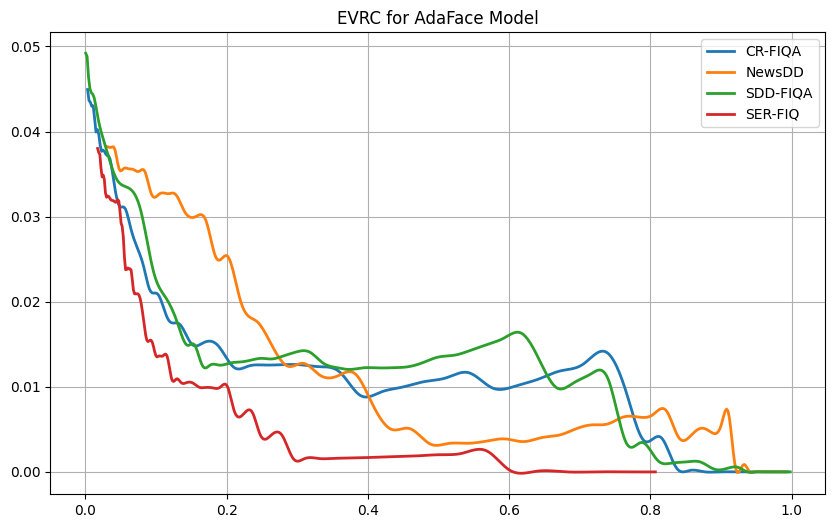

In [14]:
plt.figure(figsize=(10, 6))
adaface_evrc = evrc_df[evrc_df['model'] == 'adaface']
for i, row in adaface_evrc.iterrows():
    plt.plot(row['evrc_x'], row['evrc_y'], label=mapping.get(row['method']), linewidth=2)
plt.title('EVRC for AdaFace Model')
plt.grid()
plt.legend()

Text(0.5, 1.0, 'EVRC for Facenet Model')

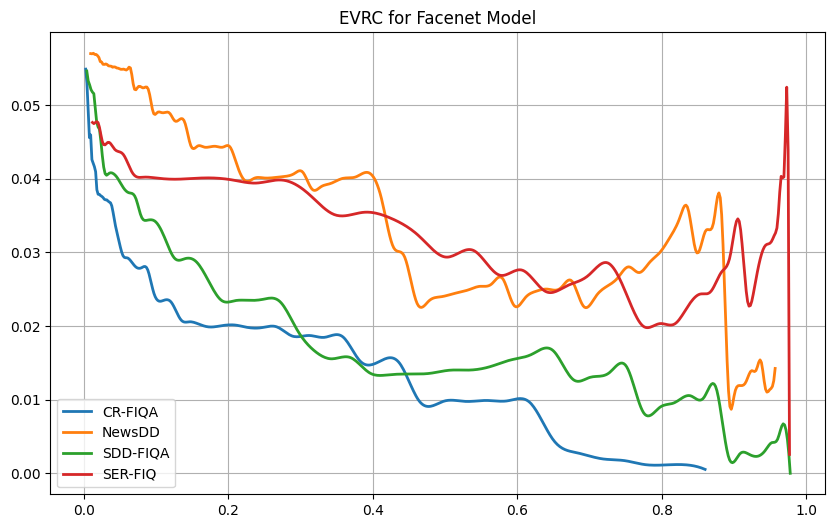

In [15]:
plt.figure(figsize=(10, 6))
facenet_evrc = evrc_df[evrc_df['model'] == 'facenet']
for i, row in facenet_evrc.iterrows():
    plt.plot(row['evrc_x'], row['evrc_y'], label=mapping.get(row['method']), linewidth=2)
plt.grid()
plt.legend()
plt.title('EVRC for Facenet Model')